In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Cargar los datos
df_observations = pd.read_csv(r"C:\Users\joant\OneDrive\Stucom\MasterIA\BigData\Projecte3_Meteorologia\Datos_Proyecto\observations_lleno.csv")
df_cloudiness = pd.read_csv(r"C:\Users\joant\OneDrive\Stucom\MasterIA\BigData\Projecte3_Meteorologia\Datos_Proyecto\cloudiness.csv")
df_date = pd.read_csv(r"C:\Users\joant\OneDrive\Stucom\MasterIA\BigData\Projecte3_Meteorologia\Datos_Proyecto\dates.csv")
df_seasons = pd.read_csv(r"C:\Users\joant\OneDrive\Stucom\MasterIA\BigData\Projecte3_Meteorologia\Datos_Proyecto\seasons.csv")
df_weather = pd.read_csv(r"C:\Users\joant\OneDrive\Stucom\MasterIA\BigData\Projecte3_Meteorologia\Datos_Proyecto\weather.csv")

# Realizar los merges
df_merged = pd.merge(df_observations, df_cloudiness, how='left', left_on='cloudiness_id', right_on='cloudiness_id')
df_merged = pd.merge(df_merged, df_weather, how='left', left_on='weather_id', right_on='weather_id')
df_merged = pd.merge(df_merged, df_date, how='left', left_on='date_id', right_on='date_id')
df_merged = pd.merge(df_merged, df_seasons, how='left', left_on='estacion_id', right_on='estacion_id')



In [21]:
# Eliminar columnas no relevantes
df_model = df_merged.drop(columns=['date_id', 'date', 'estacion', 'cloudiness_id', 'estacion_id', 'weather_id','cloudiness'])

# Codificar el objetivo `weather`
le = LabelEncoder()
df_model['weather_encoded'] = le.fit_transform(df_model['weather'])

# Separar características (X) y objetivo (y)
X = df_model.drop(columns=['weather', 'weather_encoded'])
y = df_model['weather_encoded']

In [22]:
# Codificar variables categóricas (One-Hot Encoding si es necesario)
X = pd.get_dummies(X, drop_first=True)

In [23]:
# Escalar variables numéricas
numeric_features = ['precipitation', 'temp_max', 'temp_min', 'wind', 'humidity', 'pressure', 'solar_radiation', 'visibility']
scaler = StandardScaler()
X[numeric_features] = scaler.fit_transform(X[numeric_features])


In [24]:
# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento del modelo (Random Forest)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)


Evaluación del modelo:
Exactitud: 0.999

Reporte de clasificación:
              precision    recall  f1-score   support

      cloudy       1.00      1.00      1.00      1169
         fog       1.00      0.99      0.99        87
        rain       1.00      1.00      1.00      1938
       storm       1.00      1.00      1.00      1791
         sun       1.00      1.00      1.00        15

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



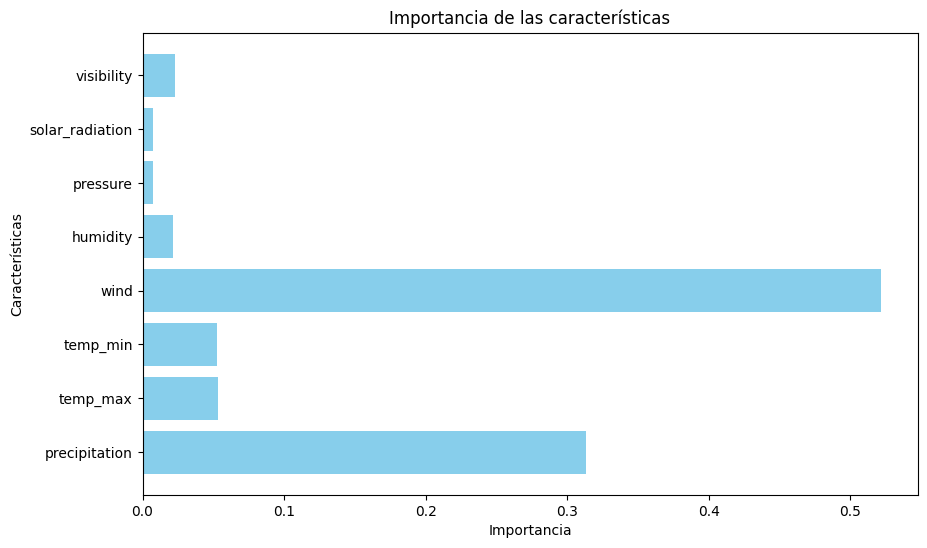

In [25]:
# Predicción y evaluación
y_pred = model.predict(X_test)
print("\nEvaluación del modelo:")
print("Exactitud:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Importancia de características
importances = model.feature_importances_
features = X.columns

# Gráfico de importancia de características
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de las características')
plt.show()

In [32]:
import numpy as np

# Generar datos nuevos
n_samples = 20
new_data = {
    'precipitation': np.random.uniform(0, 100, n_samples),  # mm de precipitación
    'temp_max': np.random.uniform(10, 40, n_samples),       # °C temperatura máxima
    'temp_min': np.random.uniform(0, 30, n_samples),        # °C temperatura mínima
    'wind': np.random.uniform(0, 15, n_samples),            # m/s velocidad del viento
    'humidity': np.random.uniform(20, 100, n_samples),      # % humedad relativa
    'pressure': np.random.uniform(980, 1050, n_samples),    # hPa presión atmosférica
    'solar_radiation': np.random.uniform(100, 1000, n_samples),  # W/m² radiación solar
    'visibility': np.random.uniform(1, 10, n_samples)      # km visibilidad
}

# Convertir a DataFrame
new_df = pd.DataFrame(new_data)

# Aplicar preprocesamiento igual que durante el entrenamiento
# Transformar variables categóricas con One-Hot Encoding
new_df = pd.get_dummies(new_df, drop_first=True)

# Escalar las variables numéricas
numeric_features = ['precipitation', 'temp_max', 'temp_min', 'wind', 'humidity', 'pressure', 'solar_radiation', 'visibility']
scaler = StandardScaler()
new_df[numeric_features] = scaler.fit_transform(new_df[numeric_features])

# Asegurarse de que las columnas coincidan con el modelo entrenado
missing_cols = set(model.feature_names_in_) - set(new_df.columns)
for col in missing_cols:
    new_df[col] = 0  # Agregar columnas faltantes con valor 0
new_df = new_df[model.feature_names_in_]  # Ordenar columnas como en el modelo

# Realizar las predicciones
predicted_classes = model.predict(new_df)
predicted_weathers = le.inverse_transform(predicted_classes)

# Añadir las predicciones al DataFrame original
new_data_df = pd.DataFrame(new_data)
new_data_df['Predicted Weather'] = predicted_weathers

# Mostrar resultados
print("\nDatos Generados con Predicciones:")
print(new_data_df)


Datos Generados con Predicciones:
    precipitation   temp_max   temp_min       wind   humidity     pressure  \
0        1.640548  25.151737   2.709608  10.929523  79.332810  1013.544170   
1       11.872991  12.791272  26.950857   1.359733  49.090694  1028.072395   
2       97.759677  25.919016  13.180837   4.273612  71.806223  1040.581813   
3       29.124168  25.982222  15.881403   8.226974  91.382761  1010.902651   
4       73.804113  10.431288  23.007809   9.727430  66.231302  1032.744746   
5       45.700059  23.283643  17.044354   0.143160  82.264868   988.920418   
6       53.638518  31.004377   3.427966   8.924174  50.060856  1001.516184   
7        3.294086  26.395106  17.597992  10.361150  48.437741  1000.796955   
8       98.680325  10.094363  21.924735   1.016036  48.350289  1020.751403   
9       78.839571  33.112746   0.715251  12.569015  75.837547  1034.419134   
10      81.284891  36.890557   5.368894   7.204300  77.684563  1010.742236   
11      21.600528  22.202244 